# <center>Film success analysis: Investigate sentiment of movie plot and movie traits(running time,budget) that affects box office revenues and imdb ratings <center/>


# 1.0 Aims & objectives 

### 1.1 Introduction

The popularity of film entertainment have brought out the needs of data analytical skills to market films.Film companies urged to find a precise prediction model to gain insight on how to target viewers.This research explores a suitable prediction model using sentiment analysis on movie plot description (with Natural Language Processing)and analyze movie running time,budget,box office,imdb ratings with data visualizing skills.
    
This project would be eye-opening as data analyzed is newest and unique.There are very few market that has provided such insights.
    
The category of film to be analysed is science fiction movies.A heuristic method approach is made and our aims are re-evaluated by result of analysis.

Final visualisations and conclusions should be accessible to film buisiness companies or someone whose area of interest is in film studies.

### 1.2 Aims and objectives
    
Contents to be analysed:
- Identify common words in science fiction movie plot
- Analyse if compound sentiment score of movie plot affects its rating
- Analyse if running time of movie and number of words in movie plot affects its rating 
- Analyse if budget affects box office revenue

Generalized aims:

1. Decide data size required to make comparisons.
2. Acquire data by webscraping and perform data cleansing.
3. Complete data analysis to distinguish difference in each data.

    
### 1.3.1 Data requirements/Scope of work
- Around 60 films collected were analyze.If there are too many films,prediction will be overloaded and difficult to distinguish difference.
    
- The movie infobox contain many titles where we can organize each into columns display each movies in row index(as Panda's data frame)

- Wikipedia has provided a list of movies in science fiction category,it contain just the right amount of films(60 films) and is up-to-date (2020-2022) therefore is chosen.In examining movies in such 2 year period span would give an accurate analysis
    
- Initially,movie dataset from Kaggle is considered but due to weakness of having outdated movies it is better to scrape recent movies provided from Wikipedia.

- Content that we will not explore to prevent information overload:
    - director/starring actors
    - release dates
    - country origin
    
### 1.3.2 Limitations of the data chosen
    
1) Restricted time period of collection
- The data specifies on a period of timeline meaning we will not be doing a very broad analysis but only an accurately scoped analysis.The downside includes that some data may be subject to change in future.

2) Incomplete data and irrelavant information
- Some movie data are not fully uploaded by Wikipedia authors.
- There might be bias towards popular movies as more accurate information is uploaded
- Dataset contain future upcoming movies which has to be cleaned
    
3)Anonymous authorship
- Wikipedia is a self-policing community where volunteer collaboratively make edit to an article.Most article will have more than one author.Eventough we could check history edits of users,these username might be fraudulently registered.In some cases,it is unable to verify the original source of information therefore we have to adapt some inaccuracy from misinterpretation such for running time,budget,box offfice.

    



### 1.3.2 Ethnical consideration/Reusage of data
To ensure wikipedia data is safe to scrape,we examined and passed the term and condition in:
- (robot.txt file) https://en.wikipedia.org/robots.txt which instructs how a web crawler should follow
- fulfilled (wikipedia terms of use)   https://foundation.wikimedia.org/wiki/Terms_of_Use stating "the content is for general informational purposes only" 
- Wikipedia says permission is granted to reuse and remodify its text under the terms of the Creative Commons Attribution-ShareAlike 3.0 license  https://creativecommons.org/licenses/by-sa/3.0 .The terms includes attribution to authors(therefore we gave appropraite credit in reference)

    
### 1.3.3 Potential implication of using such data to present analysis
      
The data would potentially expose movie's negative side,this can result incorrect assumptions and harm movie's reputation.
    
Therefore,the data are only used as:
- analyze movie's features without 1-on-1 comparison between specific movies
- the conclusions drawn does not represent exact criteria for success of a movie,but merely subjective.

### 2.1.1 Import BeutifulSoup library for web scrapping

In [1]:
from bs4 import BeautifulSoup as bs
import requests


### 2.1.2 Getting info box details of a single film first


Here we get a request URL from wikipedia to scrape HTML of single movie named Archive(as it has all data we required)

In [2]:
URL = requests.get("https://en.wikipedia.org/wiki/Archive_(film)")

# Convert to a beautiful soup object
soup = bs(URL.content)

# Get the table row texts in the infobox
infobox = soup.find(class_="infobox vevent")
infoTableRow = infobox.find_all("tr")
for row in infoTableRow:
    print(row.prettify())


<tr>
 <th class="infobox-above summary" colspan="2" style="font-size: 125%; font-style: italic;">
  Archive
 </th>
</tr>

<tr>
 <td class="infobox-image" colspan="2">
  <a class="image" href="/wiki/File:Archive_(film).jpg">
   <img alt="Archive (film).jpg" class="thumbborder" data-file-height="385" data-file-width="259" decoding="async" height="327" src="//upload.wikimedia.org/wikipedia/en/thumb/0/09/Archive_%28film%29.jpg/220px-Archive_%28film%29.jpg" srcset="//upload.wikimedia.org/wikipedia/en/0/09/Archive_%28film%29.jpg 1.5x" width="220"/>
  </a>
  <div class="infobox-caption">
   Film poster
  </div>
 </td>
</tr>

<tr>
 <th class="infobox-label" scope="row" style="white-space: nowrap; padding-right: 0.65em;">
  Directed by
 </th>
 <td class="infobox-data">
  <a href="/wiki/Gavin_Rothery_(film_creator)" title="Gavin Rothery (film creator)">
   Gavin Rothery
  </a>
 </td>
</tr>

<tr>
 <th class="infobox-label" scope="row" style="white-space: nowrap; padding-right: 0.65em;">
  Written

### 2.1.3  Assign table data contents to table heading titles in pairs

In [3]:
# retrieve content of rows which only has an list,replace junk with empty space
def retrieve_row_content(rowContent):
    if rowContent.find("li"):
        return [li.get_text(" ", strip=True).replace("\xa0", " ") for li in rowContent.find_all("li")]
    else:
        return rowContent.get_text(" ", strip=True)


# declare an empty key value pair dictionary
movie_detail = {}

for rowNumber, row in enumerate(infoTableRow):
    #first row is title
    if rowNumber == 0:
        movie_detail['title'] = row.find("th").get_text(" ", strip=True)
        
    # get table head and table data and put into dictionary
    else:
        key = row.find_next("th").get_text(" ", strip=True)
        #clean value of table data with function
        value = retrieve_row_content(row.find("td"))
        movie_detail[key] = value
    
movie_detail

{'title': 'Archive',
 'Directed by': 'Gavin Rothery',
 'Written by': 'Gavin Rothery',
 'Produced by': ['Cora Palfrey', 'Philip Herd', 'Theo James'],
 'Starring': ['Theo James',
  'Stacy Martin',
  'Rhona Mitra',
  'Peter Ferdinando',
  'Richard Glover',
  'Lia Williams',
  'Toby Jones'],
 'Cinematography': 'Laurie Rose',
 'Edited by': 'Adam Biskupski',
 'Music by': 'Steven Price',
 'Production companies': ['Independent Films',
  'Head Gear Films',
  'Untapped Films'],
 'Distributed by': 'Vertical Entertainment',
 'Release dates': ['10 July 2020 ( 2020-07-10 ) (United States)',
  '18 January 2021 ( 2021-01-18 ) (United Kingdom)'],
 'Running time': '105 minutes',
 'Country': 'United Kingdom',
 'Language': 'English',
 'Box office': '$242,195 [1]'}

## 2.2 Get each movie detail from list of science fiction movies in 2020
Each movie's URL from list is different, so we have to access into each movie's hyperlink
in the big table and then extract its details.

In [4]:
URL = requests.get("https://en.wikipedia.org/wiki/List_of_science_fiction_films_of_the_2020s")

# Convert to a beautiful soup object
soup = bs(URL.content)

# Print out the HTML
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of science fiction films of the 2020s - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c3849114-b026-4e41-a4c2-cc8a5de91990","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_science_fiction_films_of_the_2020s","wgTitle":"List of science fiction films of the 2020s","wgCurRevisionId":1129236294,"wgRevisionId":1129236294,"wgArticleId":59873627,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 Chinese-language sources (zh)","Articles wi

### 2.2.1 Modularize create_infobox function which returns any info box detail of movies given link

#### 2.2.2 clean junk text and clean superscript tags (e.g <sup>[1]</sup>) 

In [5]:
# retrieve content of rows which only has an list,replace junk text
def retrieve_row_content(rowContent):
    if rowContent.find("li"):
        return [li.get_text(" ", strip=True).replace("\xa0", " ") for li in rowContent.find_all("li")]
    else:
        return rowContent.get_text(" ", strip=True)

#remove superscript tags
def remove_tag(soup):
    for tagging in soup.find_all(["sup"]):
        tagging.decompose()
    return tagging


#create infobox for each movie function
def create_infobox(url):

    URL = requests.get(url)

    # Convert to a beautiful soup object
    soup = bs(URL.content)
    infobox = soup.find(class_="infobox vevent")
    infoTableRow = infobox.find_all("tr")

    remove_tag(soup)
    
    # declare an empty key value pair dictionary
    movie_detail = {}
    
    #first row is title
    for rowNumber , row in enumerate(infoTableRow):
        if rowNumber == 0:
            #get movie title
            #strip whitespace on front and end of text
            movie_detail['title'] = row.find("th").get_text(" ", strip=True)
        
        # get secondary titles e.g (box office)
        else:
            header = row.find('th')
            if header:
                key = row.find("th").get_text(" ", strip=True)
                value = retrieve_row_content(row.find("td"))
                movie_detail[key] = value

    return movie_detail

### 2.2.3 create_infobox function with a movie link

cleaner infobox created here

In [6]:
create_infobox("https://en.wikipedia.org/wiki/Archive_(film)")

{'title': 'Archive',
 'Directed by': 'Gavin Rothery',
 'Written by': 'Gavin Rothery',
 'Produced by': ['Cora Palfrey', 'Philip Herd', 'Theo James'],
 'Starring': ['Theo James',
  'Stacy Martin',
  'Rhona Mitra',
  'Peter Ferdinando',
  'Richard Glover',
  'Lia Williams',
  'Toby Jones'],
 'Cinematography': 'Laurie Rose',
 'Edited by': 'Adam Biskupski',
 'Music by': 'Steven Price',
 'Production companies': ['Independent Films',
  'Head Gear Films',
  'Untapped Films'],
 'Distributed by': 'Vertical Entertainment',
 'Release dates': ['10 July 2020 ( 2020-07-10 ) (United States)',
  '18 January 2021 ( 2021-01-18 ) (United Kingdom)'],
 'Running time': '105 minutes',
 'Country': 'United Kingdom',
 'Language': 'English',
 'Box office': '$242,195'}

## 2.2.4 Get URL path links of each movies and checks how many movie is scraped

root path + relative path(movie name) and append it into a movie_detail list.

In [7]:
URL = requests.get("https://en.wikipedia.org/wiki/List_of_science_fiction_films_of_the_2020s")
soup = bs(URL.content)
movies = soup.select(".wikitable i a")

root_path = "https://en.wikipedia.org/"

movie_detail_list = []
for items, movie in enumerate(movies):
    
#   stop at forthcoming movies at 2023 so we limit items to 60...
    if items<60:
        try:
            relative_path = movie['href']
            complete_path = root_path + relative_path
            title = movie['title']

            movie_detail_list.append(create_infobox(complete_path))

        except:
            print("Error obtaining detail of movie :")
            print(complete_path)
            

print("Movies collected :" , len(movie_detail_list))

Error obtaining detail of movie :
https://en.wikipedia.org//w/index.php?title=Doors(film)&action=edit&redlink=1
Movies collected : 59


### only movie 'Doors' cannot be retrieved because there no wikipedia author providing information on it

### 2.2.5 Save the scraped data as json file

In [8]:
import json

def save_file(filename, inputData):
    with open(filename, 'w', encoding='utf-8') as file:
        json.dump(inputData, file, ensure_ascii=False)
    
save_file("sciencefiction_cleaned.json", movie_detail_list)

## 2.2.6 check return of json file

In [9]:
def load_file(filename):
    with open(filename, encoding="utf-8") as file:
        return json.load(file)

movie_detail_list = load_file("sciencefiction_cleaned.json")
movie_detail_list

[{'title': '2067',
  'Directed by': 'Seth Larney',
  'Written by': ['Seth Larney', 'Additional writing: Dave Paterson'],
  'Additional dialogue by': ['Gareth Davies'],
  'Based on': 'a treatment by Gavin Scott Davis',
  'Produced by': ['Lisa Shaunessy', 'Jason Taylor', 'Kate Croser'],
  'Starring': ['Kodi Smit-McPhee',
   'Ryan Kwanten',
   'Leeanna Walsman',
   'Aaron Glenane',
   'Deborah Mailman'],
  'Cinematography': 'Earle Dresner',
  'Edited by': 'Sean Lahiff',
  'Music by': ['Kenneth Lampl', 'Kirsten Axelholm'],
  'Production companies': ['Screen Australia',
   'XYZ Films',
   'Futurism Studios',
   'South Australian Film Corporation',
   'Adelaide Film Festival',
   'Create NSW',
   'Elevate Production Finance',
   'Grumpy Sailor',
   'Kojo Entertainment',
   'Freedom Films',
   'Arcadia'],
  'Distributed by': ['Umbrella Entertainment (Australia)', 'RLJE Films (US)'],
  'Release date': ['October 2, 2020 ( 2020-10-02 ) (United States)'],
  'Running time': '114 minutes',
  'Count

# 3.0 Data cleansing/enhancing

### Tasks
- Render appropraite strings (no duplicative,concatenated strings) done 2.2.2 while creating infobox
- Remove references (superscripts) ,implemented in 2.2.2 as remove_tag
- Convert categories into correct data types
 - budget,box office money,running time into integer

# 3.1 Convert movie's budget/box office into float(better precision)

Budget/box office is in form of string:

using regular expression can convert them easily
### Before convertion :

In [10]:
print('Budget')
for movie in movie_detail_list:
    print([movie.get('Budget', 'N/A')],end=' , ')
print('')
print('')
print('')
print('Box office')
for movie in movie_detail_list:
    print([movie.get('Box office')],end=' , ')

Budget
['N/A'] , ['N/A'] , ['$125 million'] , ['$25 million'] , ['$45 million'] , ['N/A'] , ['$6–12 million'] , [['₽ 786 million', '$15–22 million']] , ['N/A'] , ['N/A'] , ['$1,500,000'] , ['$14.8 million ( ₽ 944 million)'] , ['$7 million'] , ['$25 million'] , ['$100 million'] , ['N/A'] , ['$67–80 million'] , ['N/A'] , ['N/A'] , ['$85.1 million'] , ['$26 million'] , ['$85–90 million'] , ['₽ 190 million (~US$2.6 million)'] , ['$200\xa0million'] , ['N/A'] , ['$100–125 million'] , ['N/A'] , ['N/A'] , ['$75 million'] , ['$165 million'] , ['N/A'] , ['N/A'] , ['N/A'] , ['$18 million'] , ['$75 million'] , ['N/A'] , ['$155–200 million'] , ['N/A'] , ['$190 million'] , ['N/A'] , ['N/A'] , ['N/A'] , ['N/A'] , ['N/A'] , ['N/A'] , ['$54–68 million'] , ['N/A'] , ['$10 million'] , ['₩24 billion (~US$21.2 million)'] , ['$200 million'] , ['N/A'] , ['$185 million'] , ['N/A'] , ['$200 million'] , ['$110 million'] , ['$29 million'] , ['N/A'] , ['$70 million'] , ['$5 million'] , 


Box office
[None] , ['$2

### 3.1.1 implement regular expression for conversion

In [11]:
import re

#choice of value magnitude
magnitude = r"million|billion"

# \.*\d (.more digits)
# ,\d{3}* (comma and 3 digits * means not must needed e.g '$349,757')
digit = r"(\d+(,\d{3})*\.*\d*)"


# e.g $1,500,000
value_regex = rf"\${digit}"
# e.g $6–12 million
word_regex = rf"\${digit}(-|–)?({digit})?\s({magnitude})"

#magnitude words into value
def word_into_value(word):
    magnitude_match = {"million": 1000000, "billion": 1000000000}
    return magnitude_match[word]

#handle word type only
def create_word_type(inputString):
    valueString = re.search(digit, inputString).group()
    
    # replace the comma such as 100,000 become 100000
    value = float(valueString.replace(",", ""))
    
    # get in lower case
    word = re.search(magnitude, inputString).group().lower()
    word_value = word_into_value(word)
    return word_value*value


#handle value type only
def create_value_type(inputString):
    valueString = re.search(digit, inputString).group()
    
    #replace the comma such as 100,000 become 100000
    value = float(valueString.replace(",", ""))
    return value

def convert_money(money):
    # return none if cant get anyhting to do conversion
    if money == "N/A":
        return None

    if isinstance(money, list):
        money = money[0]
    
    valueFormat = re.search(value_regex, money)
    wordFormat = re.search(word_regex, money)
    
    if wordFormat:
        return create_word_type(wordFormat.group())
    
    elif valueFormat:
        return create_value_type(valueFormat.group())

    else:
        return None
    

    
#test value type
print(convert_money('$1,500,000'))

#test word type
print(convert_money('$125 million'))
print(convert_money('$6–12 million')) # return the lower range
print(convert_money('$85.1 million'))

#convert the data types
    
for movie in movie_detail_list:
    movie['Budget (float)'] = convert_money(movie.get('Budget', "N/A"))
    movie['Box office (float)'] = convert_money(movie.get('Box office', "N/A"))
    

1500000.0
125000000.0
6000000.0
85100000.0


### After convertion :

In [12]:
print('Budget')
for movie in movie_detail_list:
    print([movie.get('Budget (float)', 'N/A')],end=" , ")
print('')
print('')
print('')
print('Box office')
for movie in movie_detail_list:
    print([movie.get('Box office (float)')],end=" , ")

Budget
[None] , [None] , [125000000.0] , [25000000.0] , [45000000.0] , [None] , [6000000.0] , [None] , [None] , [None] , [1500000.0] , [14800000.0] , [7000000.0] , [25000000.0] , [100000000.0] , [None] , [67000000.0] , [None] , [None] , [85100000.0] , [26000000.0] , [85000000.0] , [2600000.0] , [200000000.0] , [None] , [100000000.0] , [None] , [None] , [75000000.0] , [165000000.0] , [None] , [None] , [None] , [18000000.0] , [75000000.0] , [None] , [155000000.0] , [None] , [190000000.0] , [None] , [None] , [None] , [None] , [None] , [None] , [54000000.0] , [None] , [10000000.0] , [21200000.0] , [200000000.0] , [None] , [185000000.0] , [None] , [200000000.0] , [110000000.0] , [29000000.0] , [None] , [70000000.0] , [5000000.0] , 


Box office
[None] , [242195.0] , [None] , [6300000.0] , [37300000.0] , [39328.0] , [1000000.0] , [None] , [None] , [None] , [None] , [15800000.0] , [144500000.0] , [99924.0] , [3000000.0] , [None] , [49200000.0] , [95384.0] , [901093.0] , [None] , [170581.0] , 

## 3.2 Convert movie's running time into integer

As we can see running time is in form of string 'x minutes'

In [13]:
for movie in movie_detail_list:
    print([movie.get('Running time', 'N/A')], end=',')

['114 minutes'],['105 minutes'],['95 minutes'],['91 minutes'],['109 minutes'],['93 minutes'],['111 minutes'],['118 minutes'],['92 minutes'],['50 minutes'],['119 minutes'],['129 minutes'],['124 minutes'],['102 minutes'],['118 minutes'],['94 minutes'],['94 minutes'],['99 minutes'],['104 minutes'],['114 minutes'],['110 minutes'],['99 minutes'],['113 minutes'],['150 minutes'],['88 minutes'],['109 minutes'],['88 minutes'],['N/A'],['138 minutes'],['156 minutes'],['108 minutes'],['155 minutes'],['115 minutes'],['103 minutes'],['124 minutes'],['N/A'],['113 minutes'],['101 minutes'],['148 minutes'],['111 minutes'],['111 minutes'],['101 minutes'],['115 minutes'],['101 minutes'],['74 minutes'],['116 minutes'],['103 minutes'],['116 minutes'],['136 minutes'],['148 minutes'],['91 minutes'],['132 minutes'],['104 min'],['138 minutes'],['97 minutes'],['108 minutes'],['85 minutes'],['242 minutes'],['99 minutes'],

In [14]:
# running time should return as None or integer only
def minutes_to_int(runningTime):
    if runningTime == "N/A":
        return None
    
    if isinstance(runningTime, list):
        return int(runningTime[0].split(" ")[0])
    else: 
        # this is when running time is a string
        return int(runningTime.split(" ")[0])

    
# add another column for running time as integer
for movie in movie_detail_list:
    movie['Running time (int)'] = minutes_to_int(movie.get('Running time', "N/A"))

## after conversion :

In [15]:
for movie in movie_detail_list:
    print([movie.get('Running time (int)', 'N/A')],end=' , ')

[114] , [105] , [95] , [91] , [109] , [93] , [111] , [118] , [92] , [50] , [119] , [129] , [124] , [102] , [118] , [94] , [94] , [99] , [104] , [114] , [110] , [99] , [113] , [150] , [88] , [109] , [88] , [None] , [138] , [156] , [108] , [155] , [115] , [103] , [124] , [None] , [113] , [101] , [148] , [111] , [111] , [101] , [115] , [101] , [74] , [116] , [103] , [116] , [136] , [148] , [91] , [132] , [104] , [138] , [97] , [108] , [85] , [242] , [99] , 

# 3.3 Import OMdb Api to add imdb rating and plot of movies

In [16]:
movie_detail_list

[{'title': '2067',
  'Directed by': 'Seth Larney',
  'Written by': ['Seth Larney', 'Additional writing: Dave Paterson'],
  'Additional dialogue by': ['Gareth Davies'],
  'Based on': 'a treatment by Gavin Scott Davis',
  'Produced by': ['Lisa Shaunessy', 'Jason Taylor', 'Kate Croser'],
  'Starring': ['Kodi Smit-McPhee',
   'Ryan Kwanten',
   'Leeanna Walsman',
   'Aaron Glenane',
   'Deborah Mailman'],
  'Cinematography': 'Earle Dresner',
  'Edited by': 'Sean Lahiff',
  'Music by': ['Kenneth Lampl', 'Kirsten Axelholm'],
  'Production companies': ['Screen Australia',
   'XYZ Films',
   'Futurism Studios',
   'South Australian Film Corporation',
   'Adelaide Film Festival',
   'Create NSW',
   'Elevate Production Finance',
   'Grumpy Sailor',
   'Kojo Entertainment',
   'Freedom Films',
   'Arcadia'],
  'Distributed by': ['Umbrella Entertainment (Australia)', 'RLJE Films (US)'],
  'Release date': ['October 2, 2020 ( 2020-10-02 ) (United States)'],
  'Running time': '114 minutes',
  'Count

### 3.3.1 Implement function retrieve_omdb_info
Import api key from secret file and get the data with its title URL

In [17]:
# my_api_key is in secret.py folder
from secret import *

import requests
import urllib
import os

def retrieve_omdb_info(title):
    root_url = "http://www.omdbapi.com/?&"
    parameters = {"apikey": my_api_key,"t":title}
    params_encoded = urllib.parse.urlencode(parameters)
    complete_url = root_url + params_encoded
    print(complete_url)
    return requests.get(complete_url).json()

retrieve_omdb_info("Archive")

http://www.omdbapi.com/?&apikey=d70c01ae&t=Archive


{'Title': 'Archive',
 'Year': '2020',
 'Rated': 'TV-MA',
 'Released': '10 Jul 2020',
 'Runtime': '109 min',
 'Genre': 'Drama, Mystery, Sci-Fi',
 'Director': 'Gavin Rothery',
 'Writer': 'Gavin Rothery',
 'Actors': 'Theo James, Stacy Martin, Rhona Mitra',
 'Plot': '2038: George Almore is working on a true human-equivalent AI. His latest prototype is almost ready. This sensitive phase is also the riskiest. Especially as he has a goal that must be hidden at all costs.',
 'Language': 'English, Japanese, French',
 'Country': 'United Kingdom, Hungary, United States',
 'Awards': '1 win & 1 nomination',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMzFkNTRiMzYtODM2MS00YWQ2LThkNTUtMDE1Y2E2YjAwYTUxXkEyXkFqcGdeQXVyMzQwMTY2Nzk@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '6.3/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '78%'},
  {'Source': 'Metacritic', 'Value': '67/100'}],
 'Metascore': '67',
 'imdbRating': '6.3',
 'imdbVotes': '22,910',
 'imdbID': 'tt68826

### 3.3.2 Create new list of imdb rating and movie plot 
The process might take around 30 seconds to load

In [18]:
for movie in movie_detail_list:
    title = movie['title']
    omdb_info = retrieve_omdb_info(title)
    movie['imdb'] = omdb_info.get('imdbRating', None)
    movie['plot'] = omdb_info.get('Plot', None)

http://www.omdbapi.com/?&apikey=d70c01ae&t=2067
http://www.omdbapi.com/?&apikey=d70c01ae&t=Archive
http://www.omdbapi.com/?&apikey=d70c01ae&t=Artemis+Fowl
http://www.omdbapi.com/?&apikey=d70c01ae&t=Bill+%26+Ted+Face+the+Music
http://www.omdbapi.com/?&apikey=d70c01ae&t=Bloodshot
http://www.omdbapi.com/?&apikey=d70c01ae&t=Breach
http://www.omdbapi.com/?&apikey=d70c01ae&t=Color+Out+of+Space
http://www.omdbapi.com/?&apikey=d70c01ae&t=Cosmoball
http://www.omdbapi.com/?&apikey=d70c01ae&t=Freaks%3A+You%27re+One+of+Us
http://www.omdbapi.com/?&apikey=d70c01ae&t=Friend+of+the+World
http://www.omdbapi.com/?&apikey=d70c01ae&t=Intersect
http://www.omdbapi.com/?&apikey=d70c01ae&t=Invasion
http://www.omdbapi.com/?&apikey=d70c01ae&t=The+Invisible+Man
http://www.omdbapi.com/?&apikey=d70c01ae&t=Jiu+Jitsu
http://www.omdbapi.com/?&apikey=d70c01ae&t=The+Midnight+Sky
http://www.omdbapi.com/?&apikey=d70c01ae&t=Minor+Premise
http://www.omdbapi.com/?&apikey=d70c01ae&t=The+New+Mutants
http://www.omdbapi.com/?&a

### 3.3.3 Test Omdb API returns data

In [19]:
for movie in movie_detail_list:
    print([movie.get('imdb')],end=", ")

print("")
print("")
print("") 

for movie in movie_detail_list:
    print([movie.get('plot')],end=" ")

['4.9'], ['6.3'], ['4.2'], ['5.9'], ['5.7'], ['7.0'], ['6.2'], ['4.7'], ['5.4'], ['6.2'], ['3.7'], ['6.0'], ['7.1'], ['2.9'], ['5.6'], ['5.6'], ['5.3'], [None], ['6.5'], ['6.0'], ['4.7'], ['6.5'], ['6.4'], ['7.3'], ['6.7'], ['5.7'], ['2.5'], ['7.2'], ['7.2'], ['8.0'], ['5.9'], [None], ['6.9'], ['5.4'], ['7.1'], ['5.5'], ['6.3'], ['6.2'], ['5.7'], ['4.9'], ['5.1'], ['5.2'], ['5.4'], ['6.5'], ['5.9'], ['5.9'], ['4.7'], ['5.6'], ['6.5'], ['8.2'], ['6.4'], ['7.2'], ['6.9'], ['6.5'], ['5.9'], ['5.4'], ['4.6'], ['8.0'], ['5.0'], 


["One man's journey to the future to save a dying world."] ['2038: George Almore is working on a true human-equivalent AI. His latest prototype is almost ready. This sensitive phase is also the riskiest. Especially as he has a goal that must be hidden at all costs.'] ['Artemis Fowl, a young criminal prodigy, hunts down a secret society of fairies to find his missing father.'] ["Once told they'd save the universe during a time-traveling adventure, 2 would-be rocker

# 3.4 Save converted data with pickle for faster data parsing


In [20]:
import pickle

def save_pickle_file(filename, inputData):
    # pickle can be read in binary
    with open(filename, 'wb') as file:
        pickle.dump(inputData, file)

save_pickle_file("sciencefiction_complete.pickle", movie_detail_list)


# 3.4.1 Read movie_detail_list from pickle file

In [21]:
def load_pickle_file(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

movie_detail_list = load_pickle_file("sciencefiction_complete.pickle")

## 3.4.2 Convert complete movie_detail_list into Pandas dataframe

In [22]:
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

df1=pd.DataFrame(movie_detail_list)
df=df1.copy()[["title","Running time (int)","Box office (float)","Budget (float)", "plot","imdb"]]
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# convert imdb to correct number data type
df["imdb"]= pd.to_numeric(df["imdb"])
df




,title,Running time (int),Box office (float),Budget (float),plot,imdb
0,Bill & Ted Face the Music,91.0,6.300000e+06,25000000.0,"Once told they'd save the universe during a time-traveling adventure, 2 would-be rockers from San Dimas, California find themselves as middle-aged dads still trying to crank out a hit song and fulfill their destiny.",5.9
1,Bloodshot,109.0,3.730000e+07,45000000.0,"Ray Garrison, a slain soldier, is re-animated with superpowers.",5.7
2,Color Out of Space,111.0,1.000000e+06,6000000.0,A secluded farm is struck by a strange meteorite which has apocalyptic consequences for the family living there and possibly the world.,6.2
3,Invasion,129.0,1.580000e+07,14800000.0,Earth is visited by an alien species that threatens humanity's existence. Events unfold in real time through the eyes of five ordinary people across the globe as they struggle to make sense of the chaos unraveling around them.,6.0
4,The Invisible Man,124.0,1.445000e+08,7000000.0,"When Cecilia's abusive ex takes his own life and leaves her his fortune, she suspects his death was a hoax. As a series of coincidences turn lethal, Cecilia works to prove that she is being hunted by someone nobody can see.",7.1
5,Jiu Jitsu,102.0,9.992400e+04,25000000.0,"Every six years, an ancient order of jiu-jitsu fighters joins forces to battle a vicious race of alien invaders. But when a celebrated war hero goes down in defeat, the fate of the planet and mankind hangs in the balance.",2.9
6,The Midnight Sky,118.0,3.000000e+06,100000000.0,"This post-apocalyptic tale follows Augustine, a lonely scientist in the Arctic, as he races to stop Sully and her fellow astronauts from returning home to a mysterious global catastrophe.",5.6
7,The New Mutants,94.0,4.920000e+07,67000000.0,"Five young mutants, just discovering their abilities while held in a secret facility against their will, fight to escape their past sins and save themselves.",5.3
8,Skylines,110.0,1.705810e+05,26000000.0,"When a virus threatens to turn the now earth-dwelling friendly alien hybrids against humans, Captain Rose Corley must lead a team of elite mercenaries on a mission to the alien world in order to save what's left of humanity.",4.7
9,Sonic the Hedgehog,99.0,3.200000e+08,85000000.0,"After discovering a small, blue, fast hedgehog, a small-town police officer must help him defeat an evil genius who wants to do experiments on him.",6.5


# <h1> 4.0 Exploratory data analysis <h1/>
    
We use natural language processing techniques to process movie plot descriptions,this make easier for us to find accurate common words in science movie plot descriptions

    
### 4.1 Implement create_plot_types function in order of with individual lambda functions:
- plot with lower case
- plot without stop words
- plot with tokenized words
- plot with only alphabetic words
- plot with lemmatized words

In [23]:
#natural language processing
import nltk  
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter


stoppingWord = stopwords.words('english')

# use wordnet lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()  

def create_plot_types(df):
    
    # make all words lowercase in new column
    df["lowercase"]= df["plot"].str.lower()
    
    # remove stopwords from plot
    df["without_stopwords"] = df["lowercase"].apply(lambda x:' '.join([word for word in x.split() if word not in (stoppingWord)]))
    
    # tokenize every word without stop word
    df['tokenized_words'] = df.apply(lambda x: nltk.word_tokenize(x['without_stopwords']), axis=1)
    
    # column for actual alphabetic words only
    df['alpha_words'] = df['tokenized_words'].apply(lambda x: [word for word in x if word.isalpha()])
    
    # lemmatize the words in alphabets
    df['lemmatized_words'] = df['alpha_words'].apply(lambda x: [wordnet_lemmatizer.lemmatize(word) for word in x])
    
    return df

In [24]:
df_clean = create_plot_types(df)
df_clean

,title,Running time (int),Box office (float),Budget (float),plot,imdb,lowercase,without_stopwords,tokenized_words,alpha_words,lemmatized_words
0,Bill & Ted Face the Music,91.0,6.300000e+06,25000000.0,"Once told they'd save the universe during a time-traveling adventure, 2 would-be rockers from San Dimas, California find themselves as middle-aged dads still trying to crank out a hit song and fulfill their destiny.",5.9,"once told they'd save the universe during a time-traveling adventure, 2 would-be rockers from san dimas, california find themselves as middle-aged dads still trying to crank out a hit song and fulfill their destiny.","told they'd save universe time-traveling adventure, 2 would-be rockers san dimas, california find middle-aged dads still trying crank hit song fulfill destiny.","[told, they, 'd, save, universe, time-traveling, adventure, ,, 2, would-be, rockers, san, dimas, ,, california, find, middle-aged, dads, still, trying, crank, hit, song, fulfill, destiny, .]","[told, they, save, universe, adventure, rockers, san, dimas, california, find, dads, still, trying, crank, hit, song, fulfill, destiny]","[told, they, save, universe, adventure, rocker, san, dimas, california, find, dad, still, trying, crank, hit, song, fulfill, destiny]"
1,Bloodshot,109.0,3.730000e+07,45000000.0,"Ray Garrison, a slain soldier, is re-animated with superpowers.",5.7,"ray garrison, a slain soldier, is re-animated with superpowers.","ray garrison, slain soldier, re-animated superpowers.","[ray, garrison, ,, slain, soldier, ,, re-animated, superpowers, .]","[ray, garrison, slain, soldier, superpowers]","[ray, garrison, slain, soldier, superpower]"
2,Color Out of Space,111.0,1.000000e+06,6000000.0,A secluded farm is struck by a strange meteorite which has apocalyptic consequences for the family living there and possibly the world.,6.2,a secluded farm is struck by a strange meteorite which has apocalyptic consequences for the family living there and possibly the world.,secluded farm struck strange meteorite apocalyptic consequences family living possibly world.,"[secluded, farm, struck, strange, meteorite, apocalyptic, consequences, family, living, possibly, world, .]","[secluded, farm, struck, strange, meteorite, apocalyptic, consequences, family, living, possibly, world]","[secluded, farm, struck, strange, meteorite, apocalyptic, consequence, family, living, possibly, world]"
3,Invasion,129.0,1.580000e+07,14800000.0,Earth is visited by an alien species that threatens humanity's existence. Events unfold in real time through the eyes of five ordinary people across the globe as they struggle to make sense of the chaos unraveling around them.,6.0,earth is visited by an alien species that threatens humanity's existence. events unfold in real time through the eyes of five ordinary people across the globe as they struggle to make sense of the chaos unraveling around them.,earth visited alien species threatens humanity's existence. events unfold real time eyes five ordinary people across globe struggle make sense chaos unraveling around them.,"[earth, visited, alien, species, threatens, humanity, 's, existence, ., events, unfold, real, time, eyes, five, ordinary, people, across, globe, struggle, make, sense, chaos, unraveling, around, them, .]","[earth, visited, alien, species, threatens, humanity, existence, events, unfold, real, time, eyes, five, ordinary, people, across, globe, struggle, make, sense, chaos, unraveling, around, them]","[earth, visited, alien, specie, threatens, humanity, existence, event, unfold, real, time, eye, five, ordinary, people, across, globe, struggle, make, sense, chaos, unraveling, around, them]"
4,The Invisible Man,124.0,1.445000e+08,7000000.0,"When Cecilia's abusive ex takes his own life and leaves her his fortune, she suspects his death was a hoax. As a series of coincidences turn lethal, Cecilia works to prove that she is being hunted by someone nobody can see.",7.1,"when cecilia's abusive ex takes his own life 

## 4.1.1 Construct the word_count function to find length of movie plot descriptions

In [25]:

def wordCounter(inputWord):
    if isinstance(inputWord, str):
        words = inputWord.split()
        return len(words)
wordCounter("hello world")


# apply word_count function to count words of plots and assign into new column named "num_words"
df_clean["num_words"] = df_clean['plot'].apply(wordCounter).copy()

df_clean

,title,Running time (int),Box office (float),Budget (float),plot,imdb,lowercase,without_stopwords,tokenized_words,alpha_words,lemmatized_words,num_words
0,Bill & Ted Face the Music,91.0,6.300000e+06,25000000.0,"Once told they'd save the universe during a time-traveling adventure, 2 would-be rockers from San Dimas, California find themselves as middle-aged dads still trying to crank out a hit song and fulfill their destiny.",5.9,"once told they'd save the universe during a time-traveling adventure, 2 would-be rockers from san dimas, california find themselves as middle-aged dads still trying to crank out a hit song and fulfill their destiny.","told they'd save universe time-traveling adventure, 2 would-be rockers san dimas, california find middle-aged dads still trying crank hit song fulfill destiny.","[told, they, 'd, save, universe, time-traveling, adventure, ,, 2, would-be, rockers, san, dimas, ,, california, find, middle-aged, dads, still, trying, crank, hit, song, fulfill, destiny, .]","[told, they, save, universe, adventure, rockers, san, dimas, california, find, dads, still, trying, crank, hit, song, fulfill, destiny]","[told, they, save, universe, adventure, rocker, san, dimas, california, find, dad, still, trying, crank, hit, song, fulfill, destiny]",34
1,Bloodshot,109.0,3.730000e+07,45000000.0,"Ray Garrison, a slain soldier, is re-animated with superpowers.",5.7,"ray garrison, a slain soldier, is re-animated with superpowers.","ray garrison, slain soldier, re-animated superpowers.","[ray, garrison, ,, slain, soldier, ,, re-animated, superpowers, .]","[ray, garrison, slain, soldier, superpowers]","[ray, garrison, slain, soldier, superpower]",9
2,Color Out of Space,111.0,1.000000e+06,6000000.0,A secluded farm is struck by a strange meteorite which has apocalyptic consequences for the family living there and possibly the world.,6.2,a secluded farm is struck by a strange meteorite which has apocalyptic consequences for the family living there and possibly the world.,secluded farm struck strange meteorite apocalyptic consequences family living possibly world.,"[secluded, farm, struck, strange, meteorite, apocalyptic, consequences, family, living, possibly, world, .]","[secluded, farm, struck, strange, meteorite, apocalyptic, consequences, family, living, possibly, world]","[secluded, farm, struck, strange, meteorite, apocalyptic, consequence, family, living, possibly, world]",22
3,Invasion,129.0,1.580000e+07,14800000.0,Earth is visited by an alien species that threatens humanity's existence. Events unfold in real time through the eyes of five ordinary people across the globe as they struggle to make sense of the chaos unraveling around them.,6.0,earth is visited by an alien species that threatens humanity's existence. events unfold in real time through the eyes of five ordinary people across the globe as they struggle to make sense of the chaos unraveling around them.,earth visited alien species threatens humanity's existence. events unfold real time eyes five ordinary people across globe struggle make sense chaos unraveling around them.,"[earth, visited, alien, species, threatens, humanity, 's, existence, ., events, unfold, real, time, eyes, five, ordinary, people, across, globe, struggle, make, sense, chaos, unraveling, around, them, .]","[earth, visited, alien, species, threatens, humanity, existence, events, unfold, real, time, eyes, five, ordinary, people, across, globe, struggle, make, sense, chaos, unraveling, around, them]","[earth, visited, alien, specie, threatens, humanity, existence, event, unfold, real, time, eye, five, ordinary, people, across, globe, struggle, make, sense, chaos, unraveling, around, them]",38
4,The Invisible Man,124.0,1.445000e+08,7000000.0,"When Cecilia's abusive ex takes his own life and leaves her his fortune, she suspects his death was a hoax. As a series of coincidences turn lethal, Cecilia works to prove that she is being hunted by someone nobody can see.",7.1,"when cecilia's abusive e

# 4.1.2 Make lemmatized words into single list  and apply Counter to most appeared words

In [26]:
newdf = df_clean

import itertools 

#convert the lemmatized word column to a single list 
lemmaWord = newdf.lemmatized_words.to_list() 

#connect the list of lists 
lemmaWordAll = (list(itertools.chain.from_iterable(lemmaWord)))    

#use the Counter function on list of words
cnt = Counter(lemmaWordAll)  

#use most_common function to find most repeated words
print(dict(cnt.most_common(20)))    

#make list to a dictionary so we have key value pair of word : value repeated
common_words = dict(cnt.most_common(20))       

#this is for word cloud analysis(for more common words)
common_words1 = dict(cnt.most_common(50)) 



{'world': 7, 'two': 5, 'alien': 4, 'humanity': 4, 'becomes': 4, 'save': 3, 'family': 3, 'real': 3, 'life': 3, 'war': 3, 'go': 3, 'planet': 3, 'fight': 3, 'escape': 3, 'past': 3, 'must': 3, 'mission': 3, 'dangerous': 3, 'reality': 3, 'adventure': 2}


# 4.2 Identify common words in movie plot


## Import matplot library to draw plots

In [27]:
import matplotlib.pyplot as plt


### 4.2.1 Create horizontal plot showing common words in science fiction movie plot


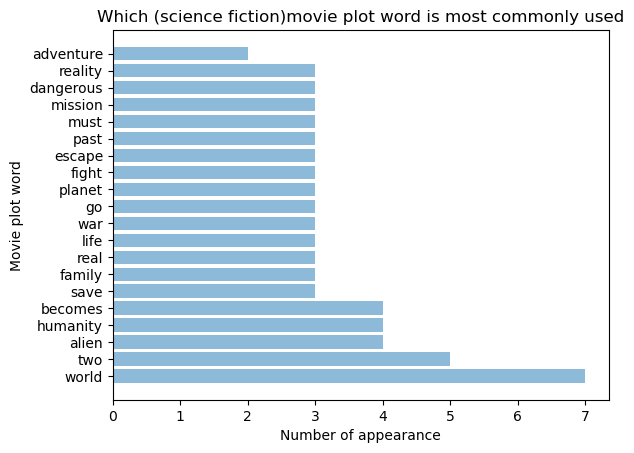

In [28]:
#assign the y axis words
keys = common_words.keys()  

#assign the x axis values
values = common_words.values()  

y=list(keys)
x=list(values)
plt.barh(y, x,alpha=0.5)
 
plt.ylabel("Movie plot word")
plt.xlabel("Number of appearance")
plt.title("Which (science fiction)movie plot word is most commonly used")
plt.show()

# 4.2.2 Create word cloud to show other common words in science fiction movie plot


#### Import word cloud library

In [29]:
from wordcloud import WordCloud

#### Create wordcloud

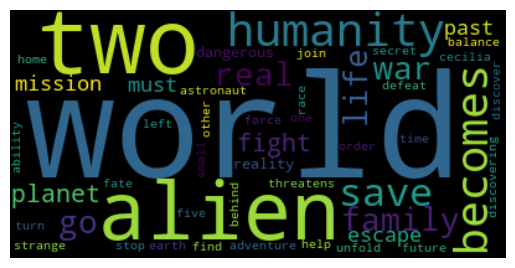

In [30]:
#draw wordcloud
wordcloud = WordCloud().generate_from_frequencies(common_words1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Conclusion : Science fiction movies plot are popular with terms surounding world,alien,humanity,two(a contrasting figure),mission,planet,war


# 4.3 Analyse if sentiment of movie plot affects its imdb rating

#### Import nltk vader sentiment analyser library

### 4.3.1 Create new columns to store compound sentiment scores

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
# Create nltk sentiment analyser
analyser = SentimentIntensityAnalyzer()

df_clean['Comp_Sentiment'] = 0

for i in range(len(df_clean)):
    sen_score = analyser.polarity_scores(df_clean['lowercase'][i])
    #take every single sentiment scores of film and enter them into the dataframe
  
    df_clean.loc[i,['Comp_Sentiment']] = sen_score['compound']

## Show returned sentiment scores in columns after analyzed

In [32]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sentiments = pd.melt(df_clean, id_vars =['title'],value_vars =['Comp_Sentiment'])
sentiments

,title,variable,value
0,Bill & Ted Face the Music,Comp_Sentiment,0.8126
1,Bloodshot,Comp_Sentiment,0.0000
2,Color Out of Space,Comp_Sentiment,-0.8020
3,Invasion,Comp_Sentiment,-0.8225
4,The Invisible Man,Comp_Sentiment,-0.9118
5,Jiu Jitsu,Comp_Sentiment,-0.2617
6,The Midnight Sky,Comp_Sentiment,-0.8442
7,The New Mutants,Comp_Sentiment,0.0772
8,Skylines,Comp_Sentiment,0.5859
9,Sonic the Hedgehog,Comp_Sentiment,-0.6908


# 4.3.2 Draw scatter plot to analyse if movie's sentiment affects its imdb ratings



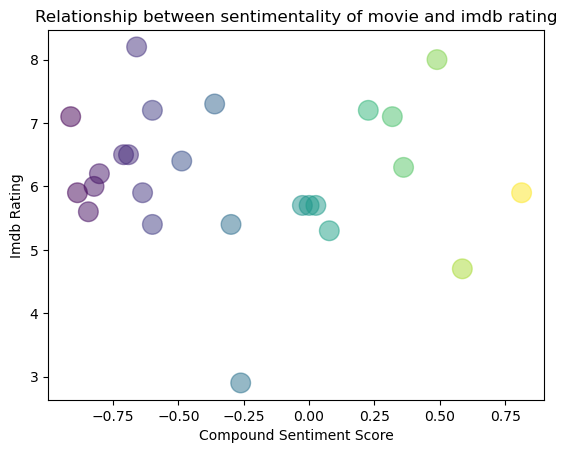

In [33]:
x = df_clean['Comp_Sentiment']
y = df_clean['imdb']
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Imdb Rating")
plt.title("Relationship between sentimentality of movie and imdb rating")
colors = df_clean['Comp_Sentiment']

area = 200
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

## Observation : 
### There are more negative sentiment movies(14 counts) that scores imdb rating of 5-8 than the positives movies(8 counts)

# 4.3.2 Bar plot to analyse if movie's sentiment affects its imdb ratings

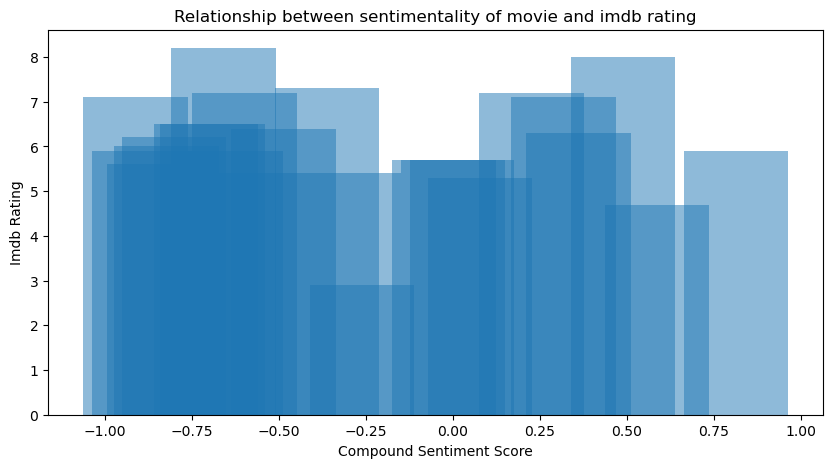

In [34]:
fig = plt.figure(figsize = (10, 5))
x = df_clean['Comp_Sentiment']
y = df_clean['imdb']

plt.bar(x,y,
        width = 0.3,alpha=0.5)
 
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Imdb Rating")
plt.title("Relationship between sentimentality of movie and imdb rating")
plt.show()

## Observation: 
### The darker area supports claim that there are more negative sentiment movies scores imdb rating up to 6

# 4.4 Analyse if running time of movie and number of words in movie plot affects its imdb rating 

## 4.4.1 Draw 3d scatter plot to show all relation
3D Graph exemplifies multiple variable relationship well as it can contain 3 axis to plot,but this downside includes overcrowding information. Hence it added color feature representing rating,the yellower the greater the rating.Also,the greater the size of ellipse meaning greater plot length

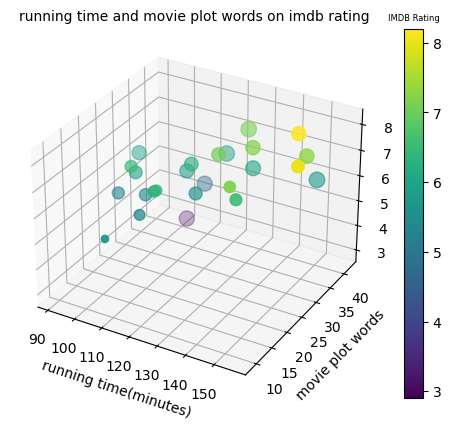

In [35]:
#we use matplotlib notebook to rotate graph 
# %matplotlib notebook 
from mpl_toolkits.mplot3d import Axes3D

fig =plt.figure()
ax=fig.add_subplot(111,projection='3d')

X=df_clean['Running time (int)']
Y= df_clean['num_words']
Z=df_clean['imdb']

fg = ax.scatter3D(X,Y,Z,s=df_clean['num_words']*3,c=df_clean['imdb'])

ax.set_xlabel('running time(minutes)')
ax.set_ylabel('movie plot words')
ax.set_zlabel('imdb rating')


clb=plt.colorbar(fg)
#set the colorbar title
clb.ax.set_title('IMDB Rating',fontsize=6)
plt.title("running time and movie plot words on imdb rating",fontsize=10) 
plt.show()




### Observation 1 : we can see as running time increase,rating increases 
the longer the movie plays the better of its rating as evidence shows linear uprise

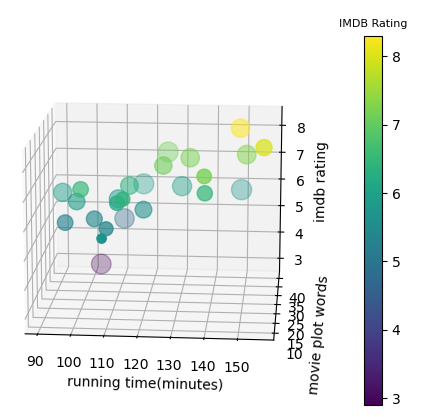


### Observation 2 : we also see that movie plot with average amount of word(in the middle gathered) produce high rating 
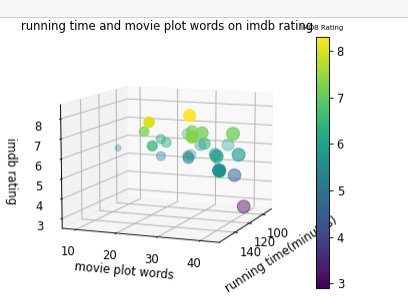

This means it is important to have average plots to make movie interesting,a overly or under descripted movie plot does not really contribute to its rating


# 4.5 Analyse if budget affects box office revenue? 
## 4.5.1 create a 2 overlapping line plot to show this relationship

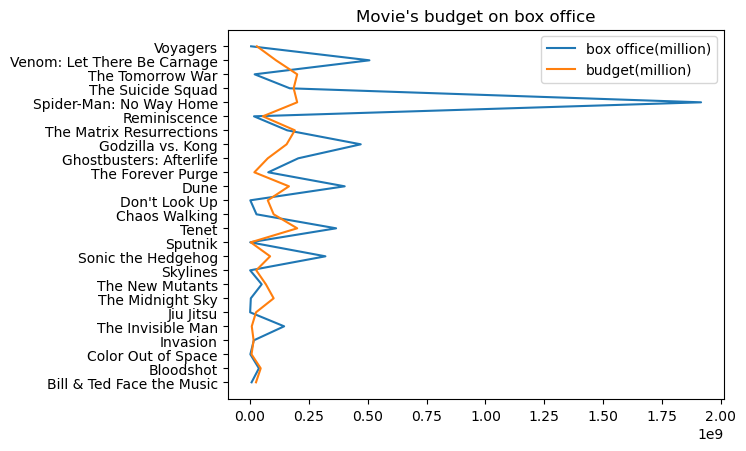

In [36]:
%matplotlib inline
x=df_clean['Box office (float)']
y=df_clean['title']
z=df_clean['Budget (float)']

line1=plt.plot(x,y) 
line2=plt.plot(z,y) 
plt.title("Movie's budget on box office") 
plt.legend(["box office(million)","budget(million)"])
plt.show()

## Observation : 

### Generally, spikes in budget also spikes in revenue,however some movies with high budget still only produce low revenues

## 4.5.2 create dot plot to show the relationship of budget and revenue

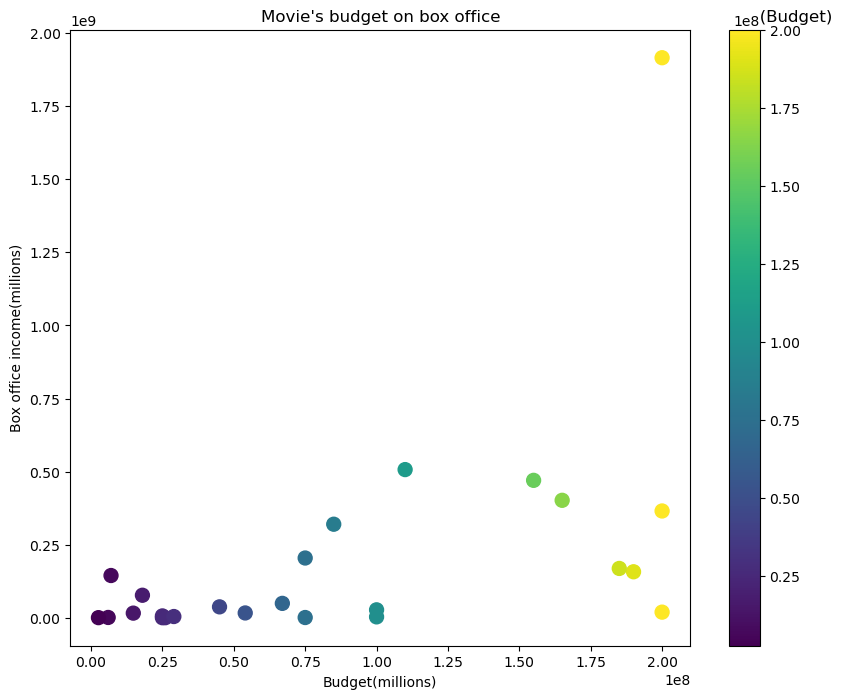

In [37]:
plt.gcf().set_size_inches(10,8 )
x = df_clean['Budget (float)']
y = df_clean['Box office (float)']
plt.xlabel("Budget(millions)")
plt.ylabel("Box office income(millions)")

colors = df_clean['Budget (float)']

area = 100

fg = plt.scatter(x, y, s=area, c=colors)

# create color bar to show budget size
clb = plt.colorbar(fg)
clb.ax.set_title('')
clb.ax.set_title('   (Budget)',horizontalalignment='left')
plt.title("Movie's budget on box office") 
plt.show()

## Observation : Many low budget movie has low revenues,they cannot surpass 0.25 y-mark ,some with moderate budget can generate high revenue(hitting 0.5 y-mark) also 

### conclusion : the higher the budget the better the box office,they could score more above 0.25 y-mark

# 5.0 Summary
## 5.1 Conclusion
From the completed analysis,we are able to draw perspective of how common words,sentiment of movie plot,budget,running time,box office,imdb rating determines an outstanding movie.
This includes:
- Breakdowned common words used in science fiction movie plots,popular terms including world,alien,humanity,mission,planet,war
- negative sentiment of movie plot results better movie rating,meaning movie should emphasize on some negative elements.
- the moderate and higher of budget produce better movie revenue
- longer running time and average movie plot words statistically promote better ratings


The data relationship established in this project can bring further exploration and deeper aspect of research.

Flaws within project is that with only one machine learning tool is not enough.
To improve the project,more sentiment analysis tools such as TextBlob/Spacy/Gensim should be implemented so we can compare the difference of each outcome from different tools. 

# <h1>6.0 Reference and resources<h1/>

Webscraping
- Beutiful soup documentation (https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- Webscraping lecture and lab by author Dr Sean McGrath
- Webscraping and APIs by Llewelyn Fernandes (week 10)
- Data collected from wikipedia 
(https://en.wikipedia.org/wiki/List_of_science_fiction_films_of_the_2020s)

- Scraping Wikipedia with Python 
(https://medium.com/@Alexander_H/scraping-wikipedia-with-python-8000fc9c9e6c) 

- Web scraping with Beutiful Soup (https://www.youtube.com/@KeithGalli)

- Is scraping data from Wikipedia legal?
(https://www.quora.com/Is-scraping-data-from-Wikipedia-legal)

- Wikipedia:FAQ/Article subjects
(https://en.wikipedia.org/wiki/Wikipedia:FAQ/Article_subjects)


Data cleansing
- Natural Lanaguage toolkit documentation 
(https://www.nltk.org/)

- Python | Lemmatization with NLTK
(https://www.geeksforgeeks.org/python-lemmatization-with-nltk)

- Python – Itertools.chain()(https://www.geeksforgeeks.org/python-itertools-chain)

- Python RegEx w3(https://www.w3schools.com/python/python_regex.asp)

- Convert argument to a numeric type in pandas 
(https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html)


Exploratory data analysis
- Jounalistic Voice Report (week 10)
- Itertools.chain.from_iterable()
(https://www.geeksforgeeks.org/python-itertools-chain-from_iterable)

- Python Counter in Collections with Example
(https://www.guru99.com/python-counter-collections-example.html)

- 3D Plotting in Matplotlib for Python: 3D Scatter Plot 
(https://youtu.be/6ljHxJQ47Uk)

- Bar Plot in Matplotlib 
(https://www.geeksforgeeks.org/bar-plot-in-matplotlib)

- Top label for Matplotlib colorbars 
(https://www.tutorialspoint.com/top-label-for-matplotlib-colorbars)



- Resource used:vader sentiment in Journalistic Voice: exploring the differences between the writing styles of political editors for four UK news sites (sample work from week 10) 

- Guest lecture with Llewelyn Fernandes - Data Plotting






In [38]:
#pip freeze >> requirements.txt

Note: you may need to restart the kernel to use updated packages.
